# Project - AllLife Credit Card Customer Segmentation

AllLife Bank wants to focus on its credit card customer base in the next financial  year.  They  have  been  advised  by  their  marketing  research  team,  that  the penetration  in  the  market  can  be  improved. Based  on  this  input,  the  Marketing  team proposes to run personalised campaigns to target new customers as well as upsell to existing  customers.  Another  insight from  the market  research  was  that  the  customers perceive the support services of the back poorly. Based on this, the Operations team wants  to  upgrade  the  service  delivery  model,  to  ensure  that  customers  queries  are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help

#### Domain 
Banking

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Submitted by: Deep Singh Chauhan

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Imported basic libraries

In [3]:
# Load dataset into dataframe
df = pd.read_excel('Credit Card Customer Data.xlsx')

In [4]:
# having insight of data by selecting 5 rows
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [5]:
# checking size of dataframe
print('\033[1mShape of Dataset: \033[0m', df.shape)

Shape of Dataset:  (660, 7)


In [6]:
# Identify duplicates records in the data
dupes = df.duplicated()
sum(dupes)

0

In [7]:
# no duplicate found

In [8]:
# checking datatype and not null count. We can see each column has 600 rows so there is no missing values
print('\033[1mDatatype Info:\033[0m')
print()
df.info()

Datatype Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [9]:
# checking no of 0 in dataframe
df.eq(0).any()

Sl_No                  False
Customer Key           False
Avg_Credit_Limit       False
Total_Credit_Cards     False
Total_visits_bank       True
Total_visits_online     True
Total_calls_made        True
dtype: bool

In [10]:
# colummn Total_visits_bank, Total_visits_online and Total_calls_made have 0's in data
# but that looks quite logical to have zero for these column

In [11]:
df

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [12]:
# as we see from data that sl_no is sequence number and Customer Key is unique id on bank side
# we can ignore these two columns and proceed further for EDA

In [13]:
df.drop(['Sl_No', 'Customer Key'], axis=1, inplace=True)

In [14]:
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


## Exploratory Data Analysis  

### Univariate analysis

In [15]:
# Transposing it for better view
print('\033[1mStatistical Summary:\033[0m')
df.describe().T

Statistical Summary:


,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


In [16]:
# Avg_Credit_Limit is left skewed 
# Total_visits_online is left skewed


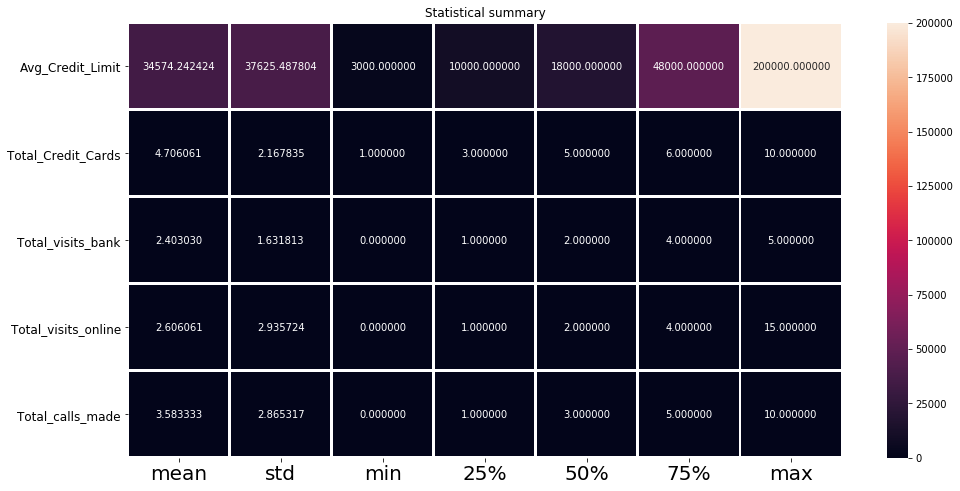

In [17]:
# Ignoring count column and displaying same statistical summary in headmap
plt.figure(figsize=(16,8))
sns.heatmap(df.describe()[1:].transpose(),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=20)
plt.yticks(fontsize=12)
plt.title("Statistical summary")
plt.show()

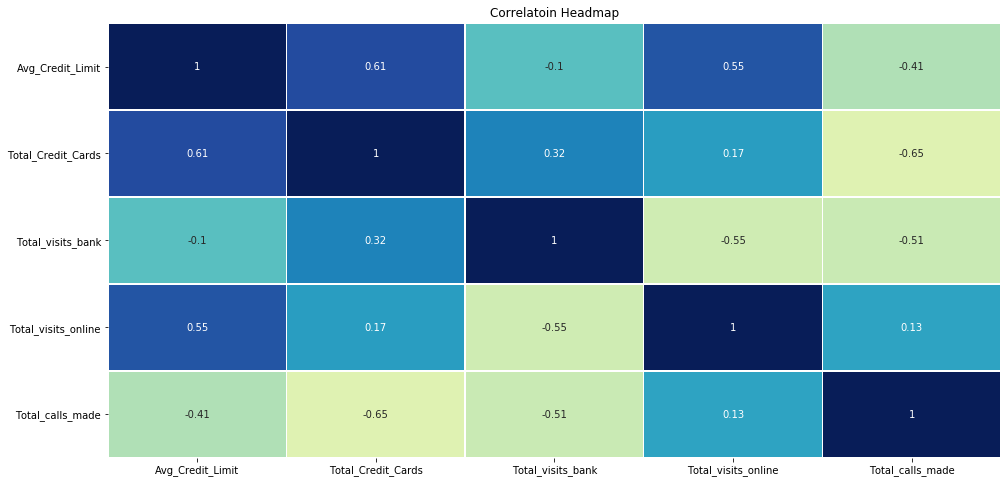

In [18]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.title("Correlatoin Headmap")
plt.show()

In [19]:
# Avg_Credit_Limit and Total_visits_onlnie are positive correlated 
# Avg_Credit_Limit and Total_Credit_cards are positive correlated 
# Total_Credit_cards and Total_calls_made have negative correlation
# Total_visits_bank and Total_visits_onlnie have negative correlation
# Total_visits_bank and Total_calls_made have negative correlation

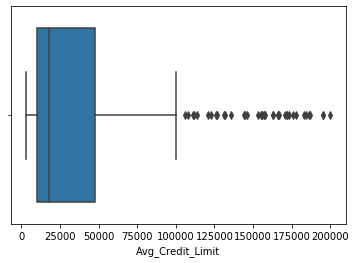

In [20]:
sns.boxplot(data=df, x='Avg_Credit_Limit') 

In [21]:
# we can see multiple outliers on credit limit

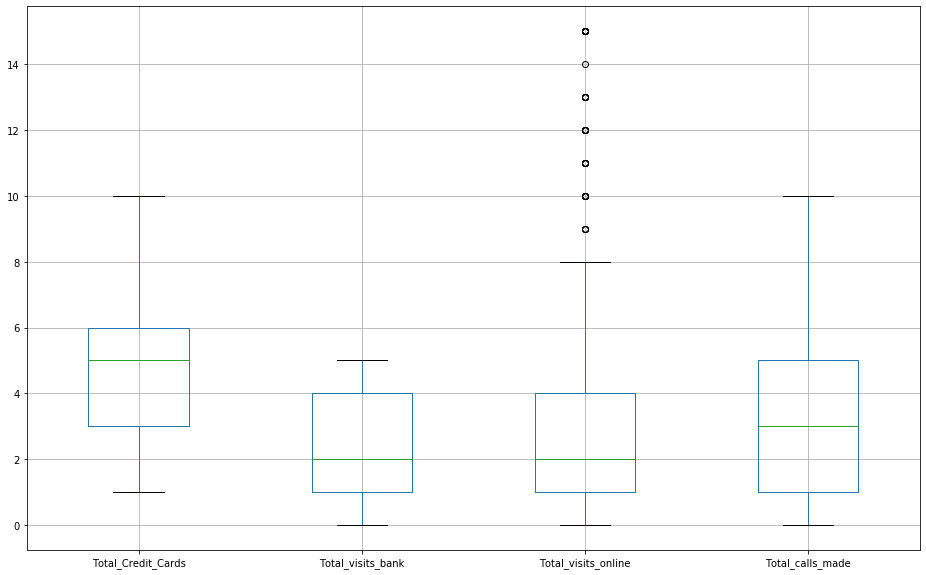

In [22]:
plt.figure(figsize=(16,10))
df.iloc[:,1:].boxplot()
plt.show()

In [23]:
# there are few outliers exists in data for Total_visits_online

Avg_Credit_Limit


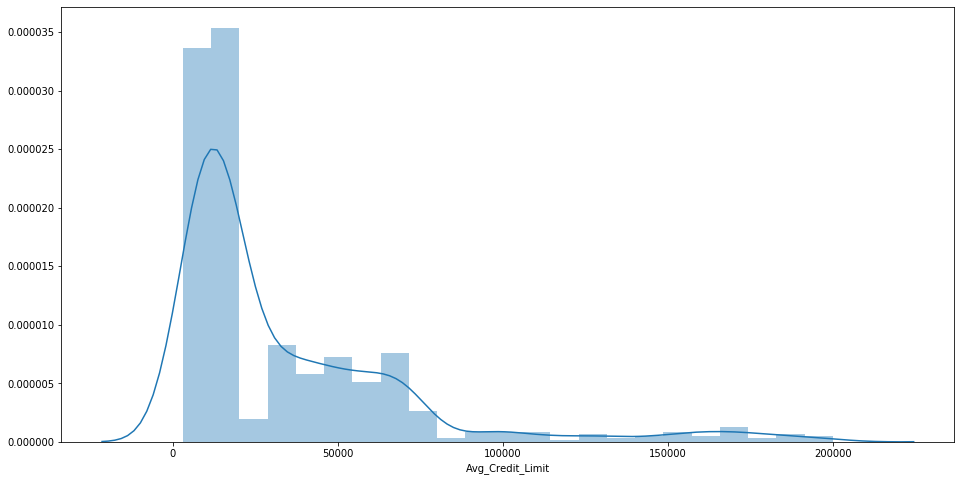

In [24]:
plt.figure(figsize=(16,8))
sns.distplot(df['Avg_Credit_Limit'])
print('Avg_Credit_Limit')

In [25]:
# there is high spike til 20,000 spend 
# and another cluster we can see from 30K to 70K 

Total_Credit_Cards


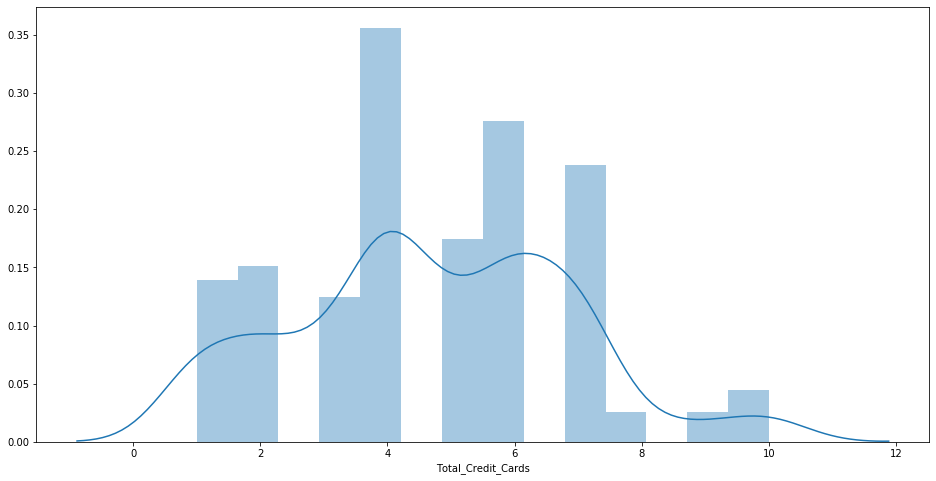

In [26]:
plt.figure(figsize=(16,8))
sns.distplot(df['Total_Credit_Cards'])
print('Total_Credit_Cards')

Total_Credit_Cards


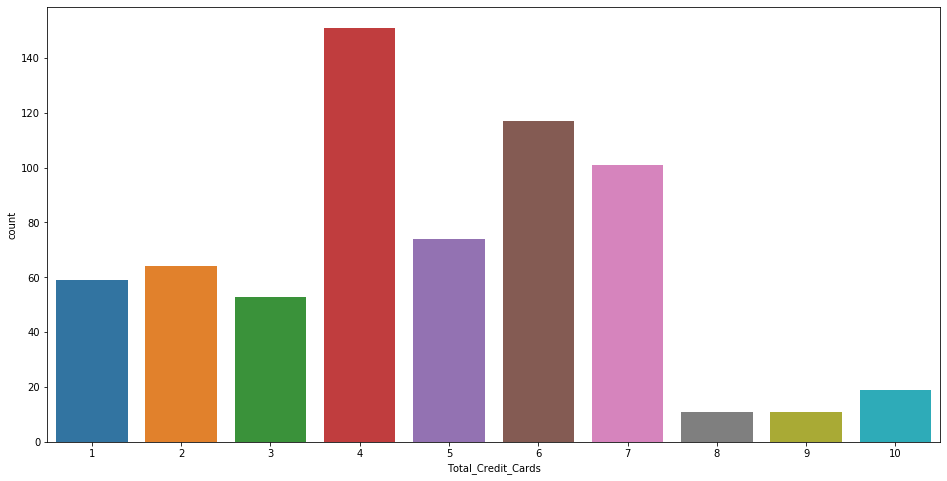

In [27]:
plt.figure(figsize=(16,8))
sns.countplot(df['Total_Credit_Cards'])
print('Total_Credit_Cards')

In [28]:
# most customer has 4-7 credit cards

Total_visits_bank


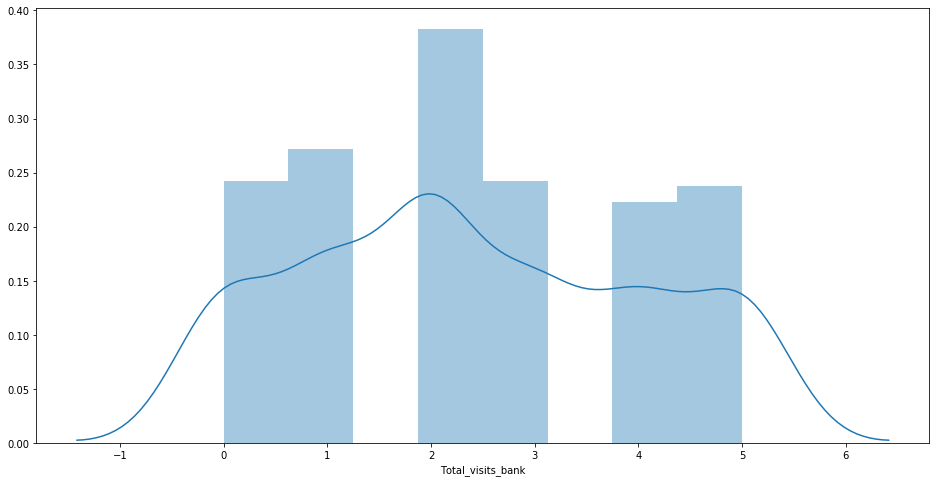

In [29]:
plt.figure(figsize=(16,8))
sns.distplot(df['Total_visits_bank'])
print('Total_visits_bank')

Total_visits_bank


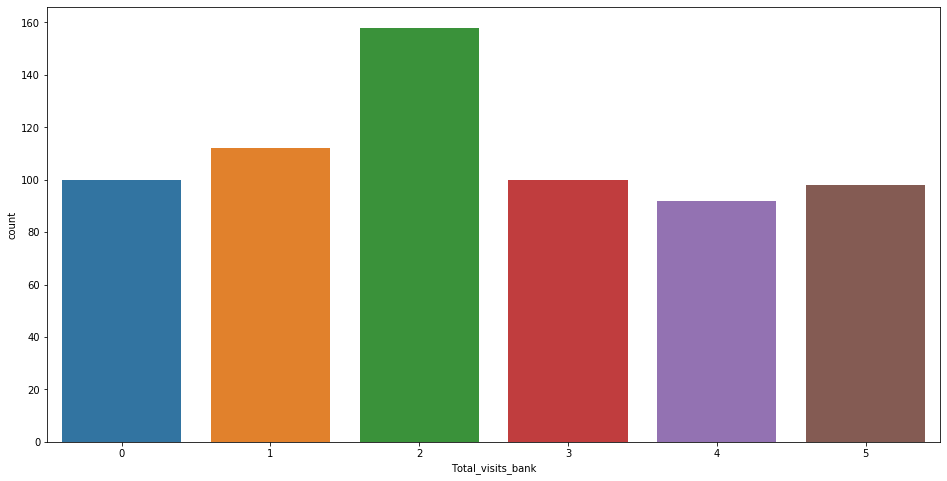

In [30]:
plt.figure(figsize=(16,8))
sns.countplot(df['Total_visits_bank'])
print('Total_visits_bank')

In [31]:
# distribution of bank visit is symmetrical, though volumne of 2 visits are high

Total_calls_made


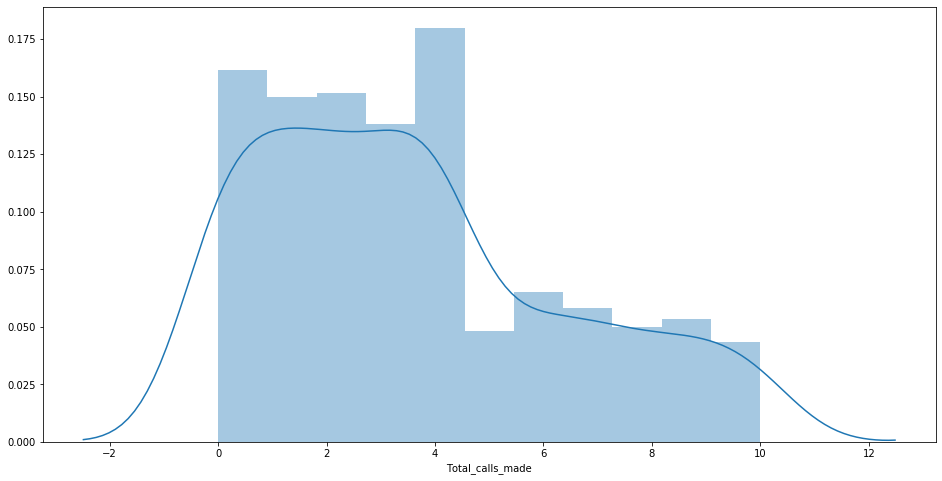

In [32]:
plt.figure(figsize=(16,8))
sns.distplot(df['Total_calls_made'])
print('Total_calls_made')

In [33]:
# calls volumne is compretively high between 0 to 4

Total_calls_made


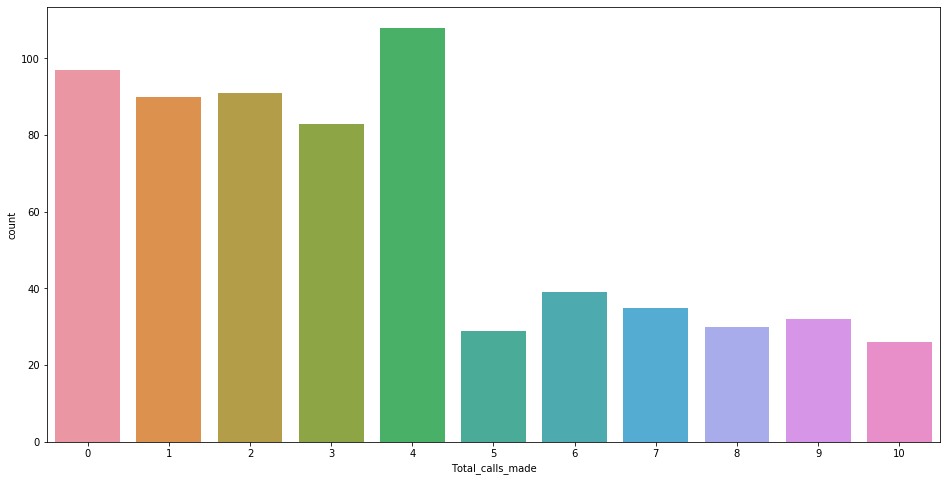

In [34]:
plt.figure(figsize=(16,8))
sns.countplot(df['Total_calls_made'])
print('Total_calls_made')

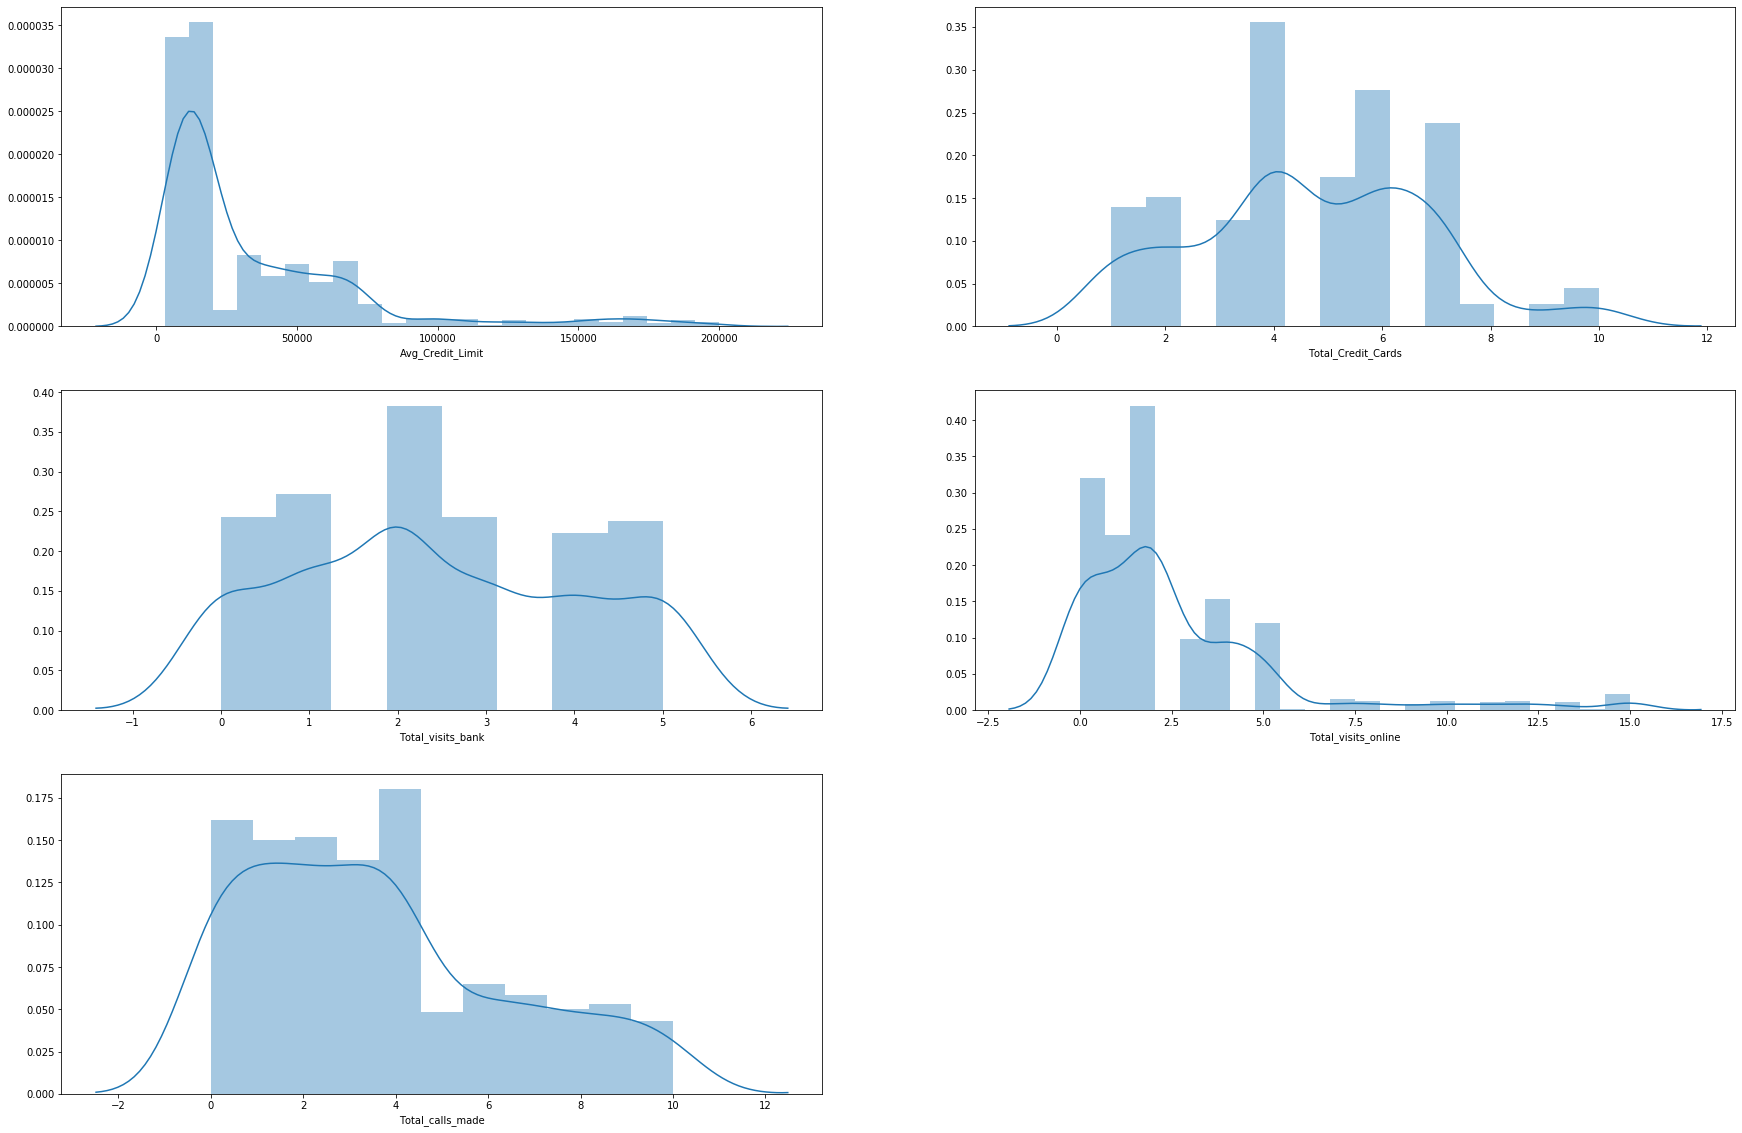

In [35]:
# looking everything together
plt.figure(figsize= (30,20))  # setting the figure size
pos = 1  # we will use this variable to index each of the plots
feedback = df.columns

for i in feedback:
    plt.subplot(3, 2, pos)
    sns.distplot(df[i])  
    pos += 1  # to plot over the grid one by one  

### Bi-Variate analysis

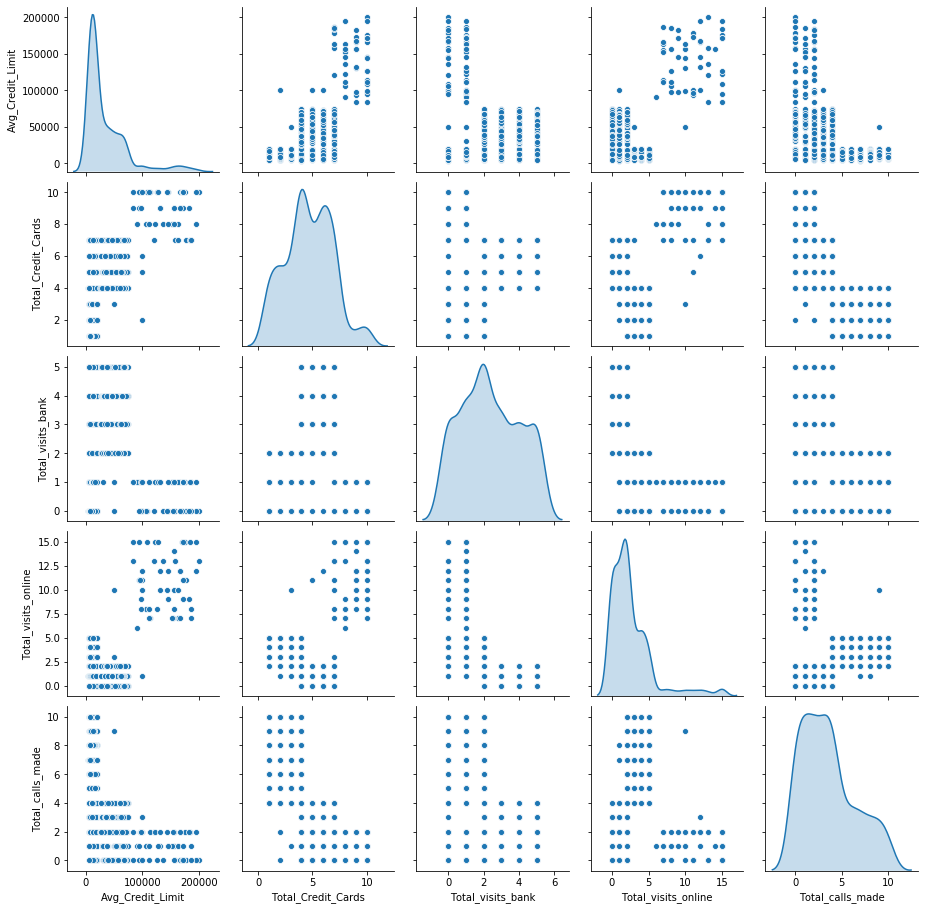

In [36]:
sns.pairplot(df, diag_kind='kde') 

In [37]:
# three segments observed in total_Credit_cards
# two segements observed in Total_Calls_made
# two segments observed in total_visit_online

# Avg_Credit_Limit and Total_visits_online are positive correlated 
# Avg_Credit_Limit and Total_Credit_cards are positive correlated 
# Total_Credit_Cards and Total_calls_made have negative correlation
# Total_visits_bank and Total_visits_online have negative correlation
# Total_visits_bank and Total_calls_made have negative correlation

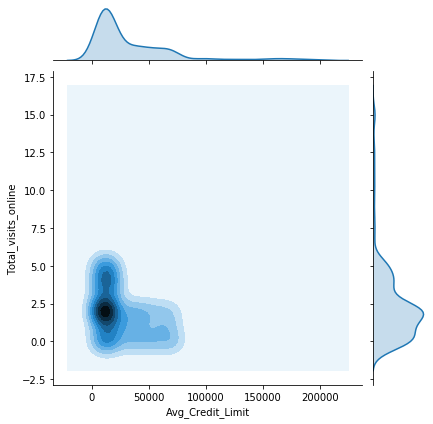

In [38]:
sns.jointplot(data=df, x='Avg_Credit_Limit', y='Total_visits_online', kind="kde")

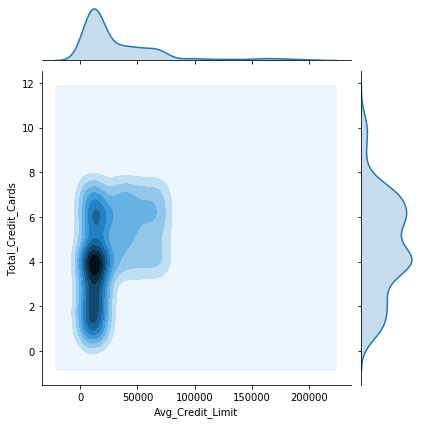

In [39]:
sns.jointplot(data=df, x='Avg_Credit_Limit', y='Total_Credit_Cards', kind="kde")

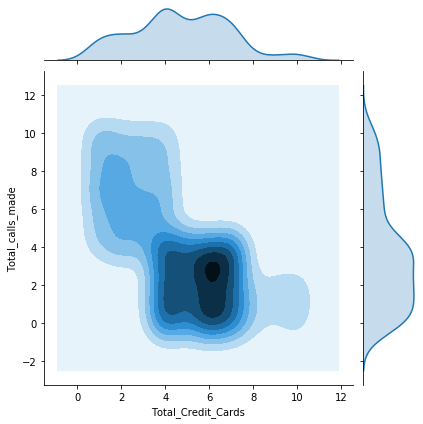

In [40]:
sns.jointplot(data=df, x='Total_Credit_Cards', y='Total_calls_made', kind="kde")

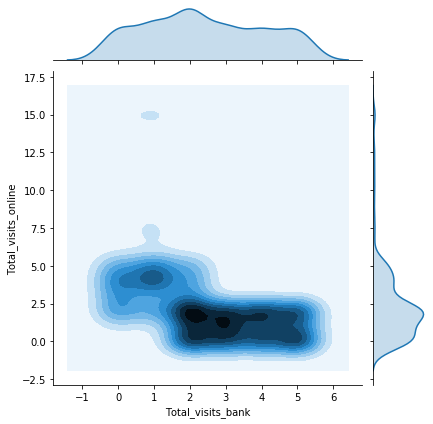

In [41]:
# Total_visits_bank and Total_visits_onlnie have negative correlation
sns.jointplot(data=df, x='Total_visits_bank', y='Total_visits_online', kind="kde")

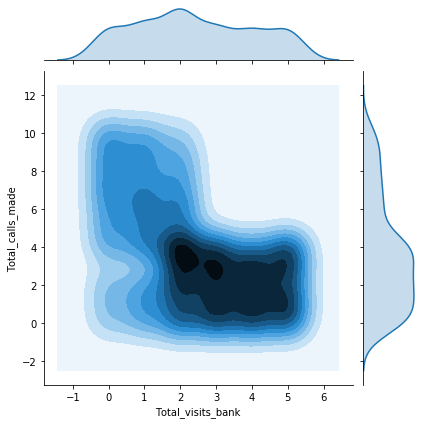

In [42]:
# Total_visits_bank and Total_calls_made have negative correlation
sns.jointplot(data=df, x='Total_visits_bank', y='Total_calls_made', kind="kde")

### Standardize the data

In [43]:
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [44]:
# Scale the data as credit limit has super high data units compares to other columns
from scipy.stats import zscore

df_z = df.apply(zscore)

In [45]:
df_z.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


### Executing K-meansclustering, using  elbow  plot and  analyse  clusters  using  boxplot

In [46]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

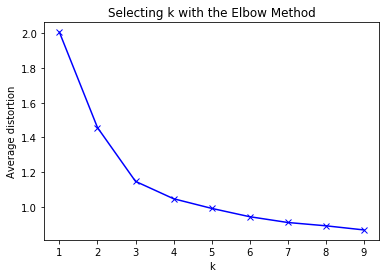

In [47]:
# Finding optimal no. of clusters
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)    
    prediction=model.fit_predict(df_z)
    meanDistortions.append(sum(np.min(cdist(df_z, model.cluster_centers_, 'euclidean'), axis=1)) / df_z
                           .shape[0])

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [48]:
# 3 and 4 both looks like a cluster index. so trying with both 4 and 3. and will analyze which is better

In [49]:
#. Trying with highter values. Set the value of k=4
kmeans = KMeans(n_clusters=4, n_init = 15, random_state=212)

In [50]:
kmeans.fit(df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=212, tol=0.0001, verbose=0)

In [51]:
centroids = kmeans.cluster_centers_

In [52]:
centroids

array([[ 0.03538264,  0.37695296,  0.04560145, -0.55776778, -0.52667828],
       [ 2.83176409,  1.86222621, -1.10576269,  2.82731942, -0.87432983],
       [-0.59597409, -1.06749333, -0.904851  ,  0.33018588,  1.16645969],
       [-0.08904777,  0.35679514,  1.29571325, -0.54390138, -0.5750638 ]])

In [53]:
#Clculate the centroids for the columns to profile
centroid_df = pd.DataFrame(centroids, columns = list(df_z) )

In [54]:
print(centroid_df)

   Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0          0.035383            0.376953           0.045601   
1          2.831764            1.862226          -1.105763   
2         -0.595974           -1.067493          -0.904851   
3         -0.089048            0.356795           1.295713   

   Total_visits_online  Total_calls_made  
0            -0.557768         -0.526678  
1             2.827319         -0.874330  
2             0.330186          1.166460  
3            -0.543901         -0.575064  


In [55]:
# creating a new dataframe for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [56]:
# Joining the label dataframe with the origin data frame.
df_labeled = df.join(df_labels)

In [57]:
df_labeled

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,100000,2,1,1,0,0
1,50000,3,0,10,9,2
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,1
...,...,...,...,...,...,...
655,99000,10,1,10,0,1
656,84000,10,1,13,2,1
657,145000,8,1,9,1,1
658,172000,10,1,15,0,1


In [58]:
df_labeled['labels'].value_counts() 

2    221
0    199
3    190
1     50
Name: labels, dtype: int64

In [59]:
silhouette_score(df_z, kmeans.labels_)

0.3556670619372605

In [60]:
# creating accuracy dataframe to store different model performance for later comparision
silhouetteScoreDf = pd.DataFrame({'Method':['K Means 4 cluster'],  'Silhouette Score': silhouette_score(df_z, kmeans.labels_)})

silhouetteScoreDf

,Method,Silhouette Score
0,K Means 4 cluster,0.355667


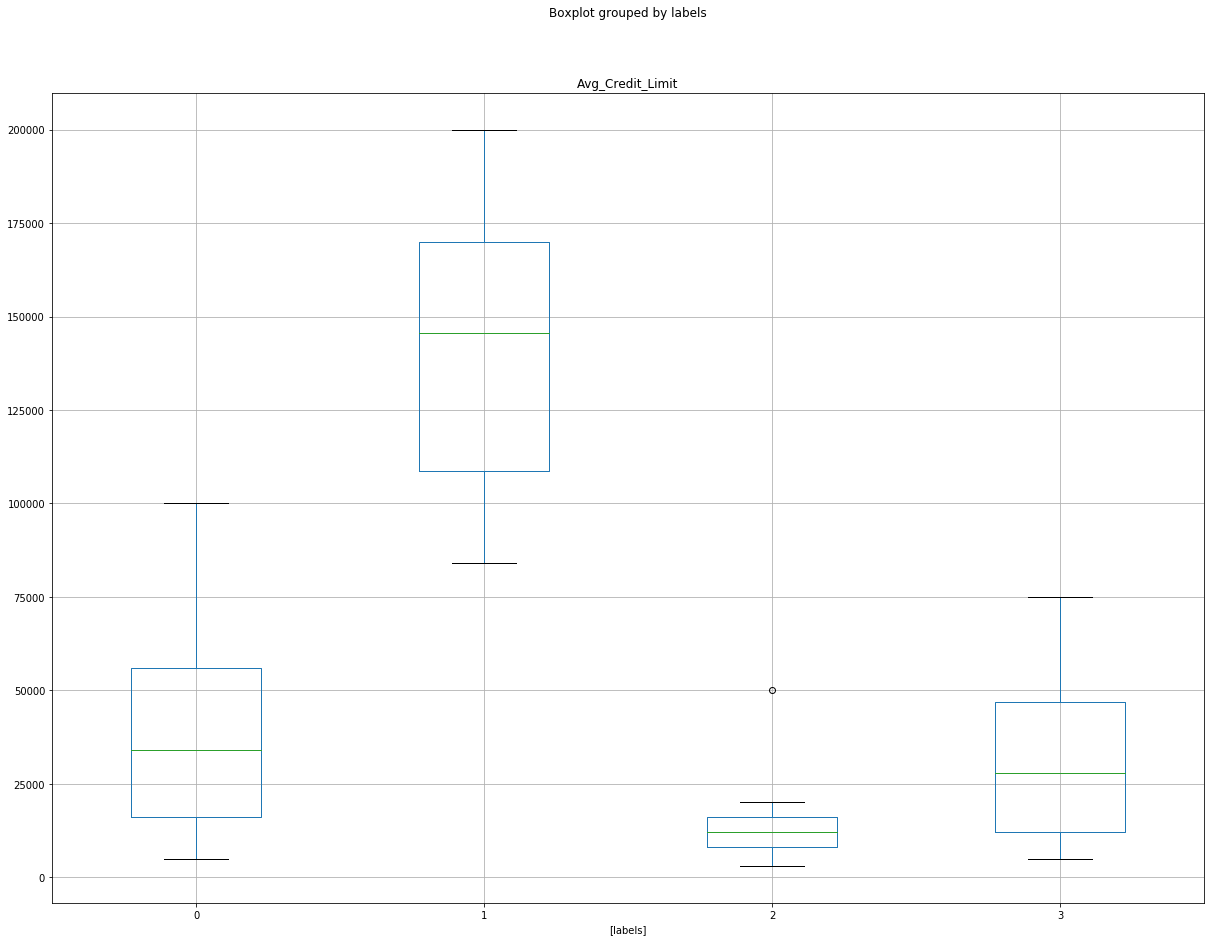

In [61]:
df_labeled[['Avg_Credit_Limit','labels']].boxplot(by = 'labels',figsize=(20, 15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025E40D11C48>,
      dtype=object)

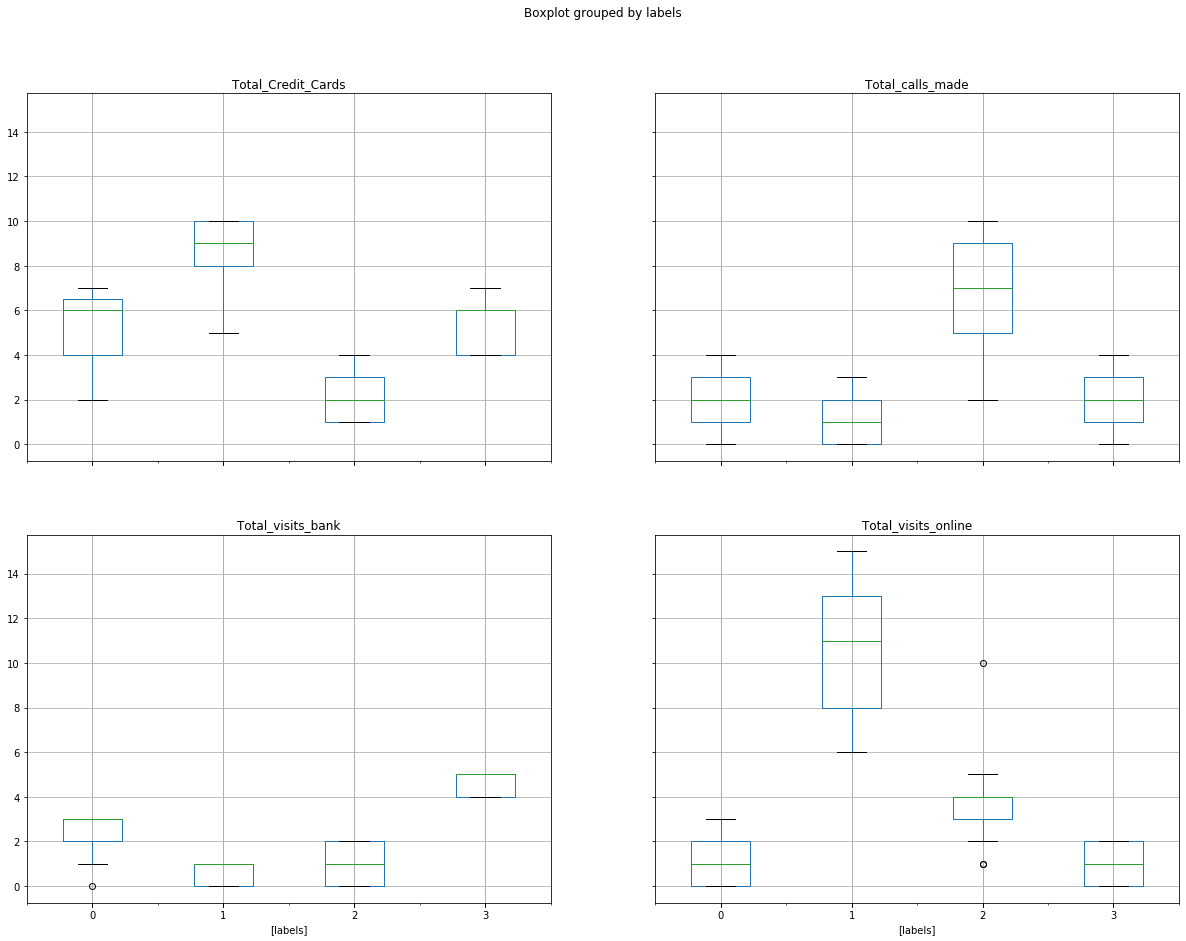

In [62]:
df_labeled.iloc[:,1:].boxplot(by = 'labels',figsize=(20, 15))

In [63]:
# there is overlapping between first and fourth cluster for avg_credit_limit
# there is overlapping between first and fourth cluster for total_credit_Cards
# there is overlapping between first, second and fourth cluster for total_calls_made
# there is overlapping between first and fourth cluster for total_visit_online

In [64]:
# now trying with 3 cluster as observed in elbow graph

#Set the value of k=3
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=212)

In [65]:
cluster_labels = kmeans.fit_predict(df_z)
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(df_z) )

In [66]:
print(centroid_df)

   Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0         -0.021062            0.373690           0.666395   
1          2.831764            1.862226          -1.105763   
2         -0.595796           -1.059623          -0.901518   

   Total_visits_online  Total_calls_made  
0            -0.553672         -0.553005  
1             2.827319         -0.874330  
2             0.322997          1.148109  


In [67]:
silhouette_score(df_z, cluster_labels)

0.5157182558881063

In [68]:
tempScore = pd.DataFrame({'Method':['K Means 3 cluster'],  'Silhouette Score': silhouette_score(df_z, kmeans.labels_ )})

silhouetteScoreDf = pd.concat([silhouetteScoreDf, tempScore])

silhouetteScoreDf

,Method,Silhouette Score
0,K Means 4 cluster,0.355667
0,K Means 3 cluster,0.515718


In [69]:
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
df_labels['labels'] = df_labels['labels'].astype('category')

In [70]:
df_labeled

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,100000,2,1,1,0,0
1,50000,3,0,10,9,2
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,1
...,...,...,...,...,...,...
655,99000,10,1,10,0,1
656,84000,10,1,13,2,1
657,145000,8,1,9,1,1
658,172000,10,1,15,0,1


In [71]:
# Joining the label dataframe with the origin data frame.
df_labeled = df.join(df_labels)

In [72]:
df_labeled['labels'].value_counts() 

0    386
2    224
1     50
Name: labels, dtype: int64

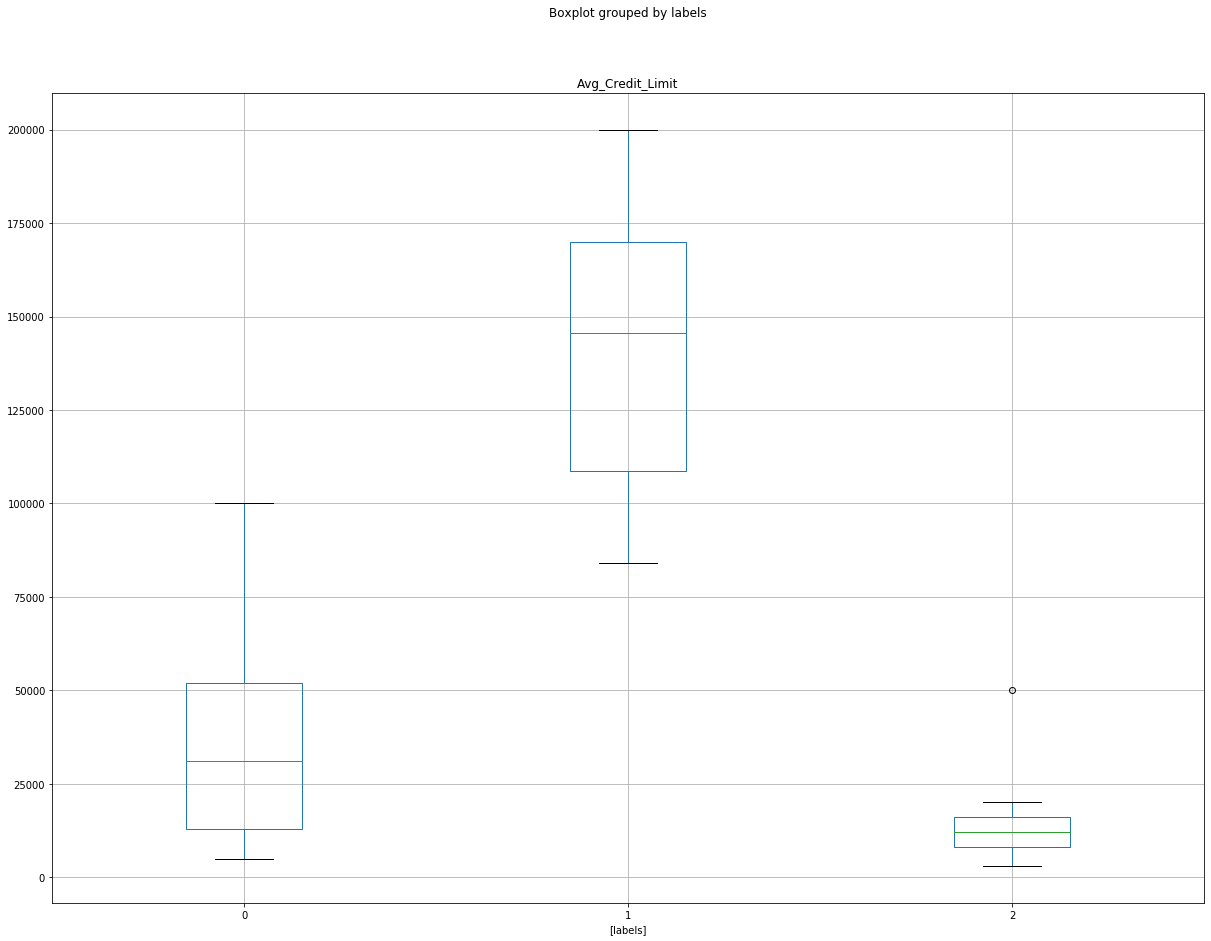

In [73]:
df_labeled[['Avg_Credit_Limit','labels']].boxplot(by = 'labels',figsize=(20, 15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025E42801A08>,
      dtype=object)

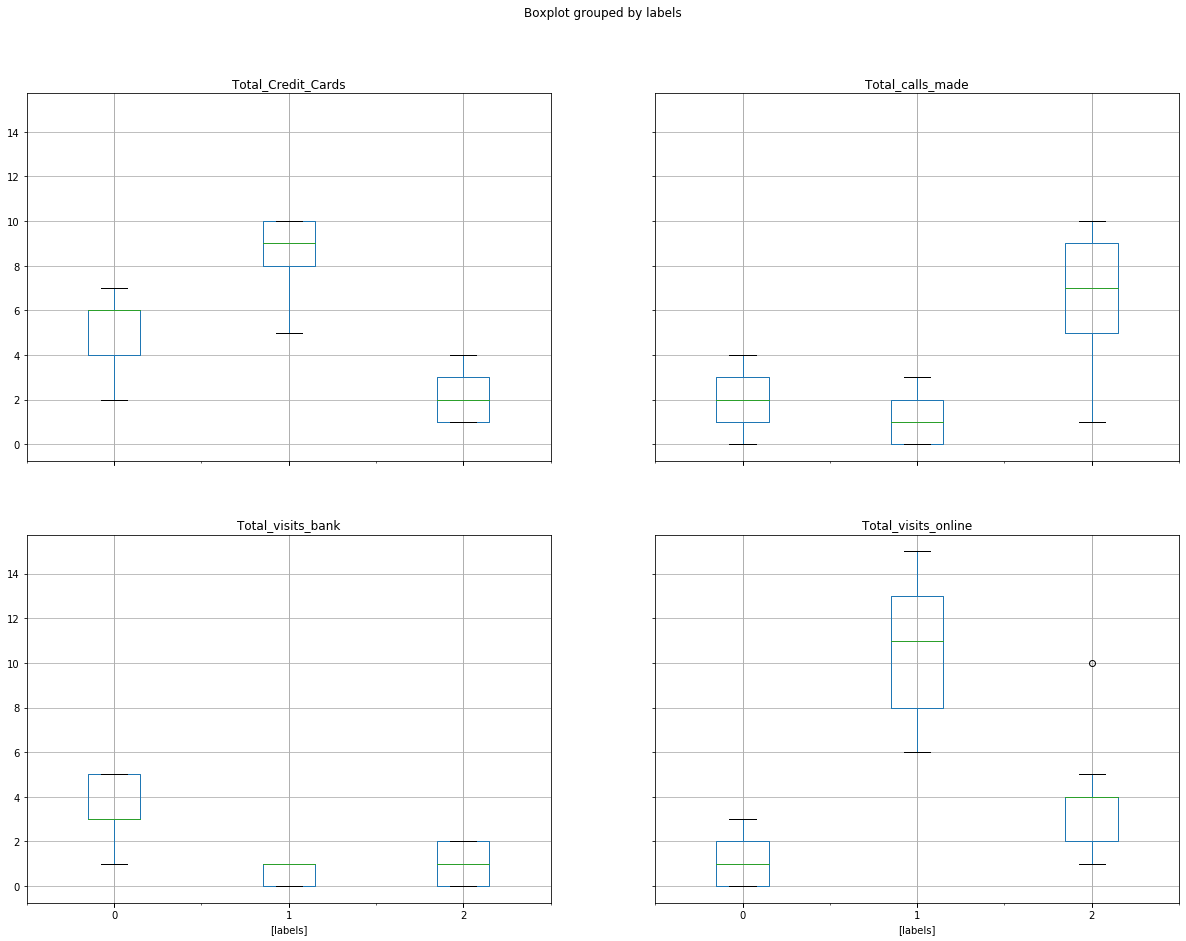

In [74]:
df_labeled.iloc[:,1:].boxplot(by = 'labels',figsize=(20, 15))

In [75]:
# there is overlapping between first and third cluster for total_visit_bank
# rest of cluster look clear separated from each other. 

In [76]:
# 3 clusters gives a clear separation of high, medium and low values

### Executing hierarchical clustering

In [77]:
# generate the linkage matrix
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(df_z, 'ward', metric='euclidean')
Z.shape

(659, 4)

In [78]:
Z

array([[ 464.        ,  497.        ,    0.        ,    2.        ],
       [ 425.        ,  455.        ,    0.        ,    2.        ],
       [ 250.        ,  361.        ,    0.        ,    2.        ],
       ...,
       [1313.        , 1314.        ,   16.84480374,  385.        ],
       [1311.        , 1316.        ,   47.06715339,  435.        ],
       [1315.        , 1317.        ,   50.16298666,  660.        ]])

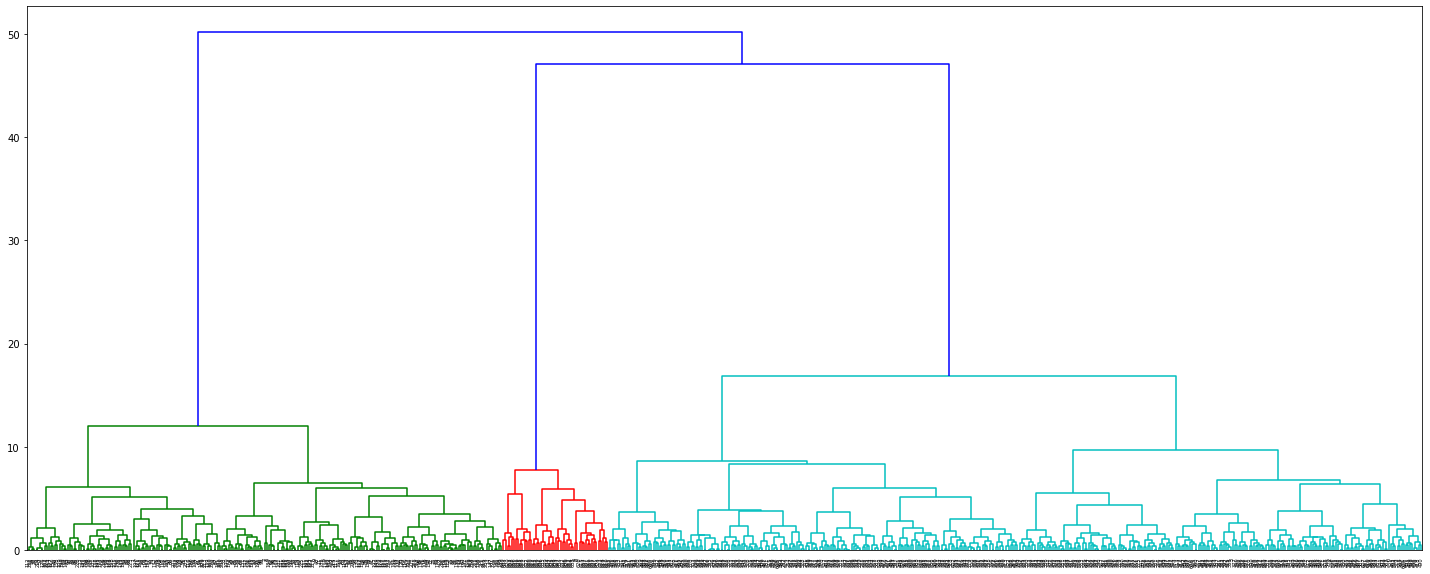

In [79]:
# entire dendogram
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

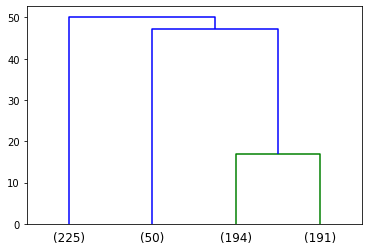

In [80]:
dendrogram(
    Z,
    truncate_mode='lastp', 
    p=4,  # show only the last 4 merged clusters
)
plt.show()

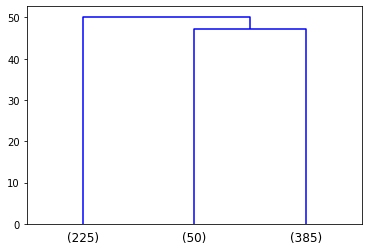

In [81]:
dendrogram(
    Z,
    truncate_mode='lastp', 
    p=3,  # show only the last 3 merged clusters
)
plt.show()

In [82]:
max_d = 46

from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([3, 1, 3, 3, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [83]:
# after trying many max_d values best scoring come for 46

In [84]:
# Calculate Avg Silhoutte Score
silhouette_score(df_z,clusters)

0.5147639589977819

### Calculate average silhouette score for both methods

In [85]:
tempScore = pd.DataFrame({'Method':['Hierarchical Cluster'],  'Silhouette Score': silhouette_score(df_z,clusters)})

silhouetteScoreDf = pd.concat([silhouetteScoreDf, tempScore])

silhouetteScoreDf

,Method,Silhouette Score
0,K Means 4 cluster,0.355667
0,K Means 3 cluster,0.515718
0,Hierarchical Cluster,0.514764


In [86]:
# Silhouette Score is better when closer 1 and worse when closer to -1

In [87]:
# K Means cluster with 3 cluster looks better then Hierarchical cluster
# looking at dendograms, we can see customer segmenration for given customer. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025E43A011C8>,
      dtype=object)

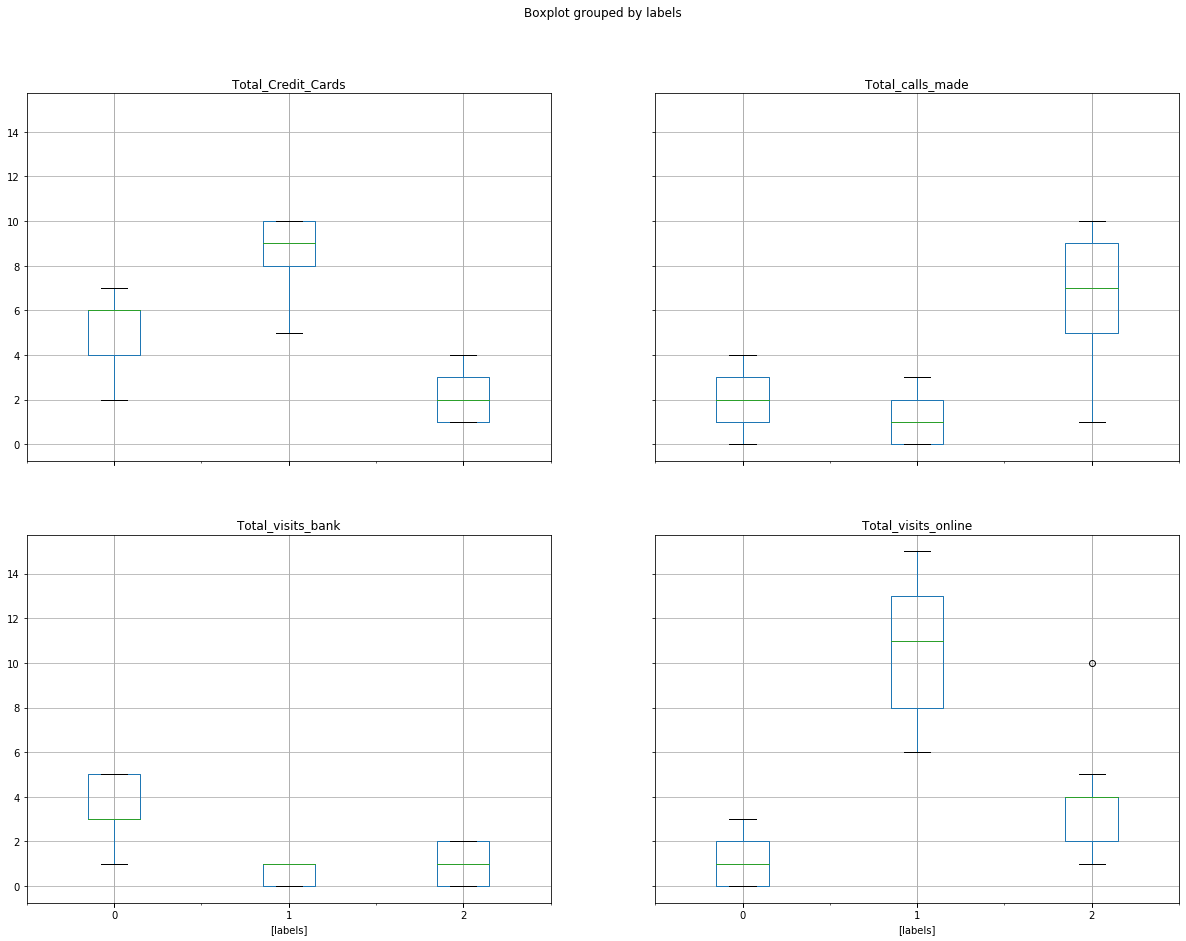

In [88]:
df_labeled.iloc[:,1:].boxplot(by = 'labels',figsize=(20, 15))

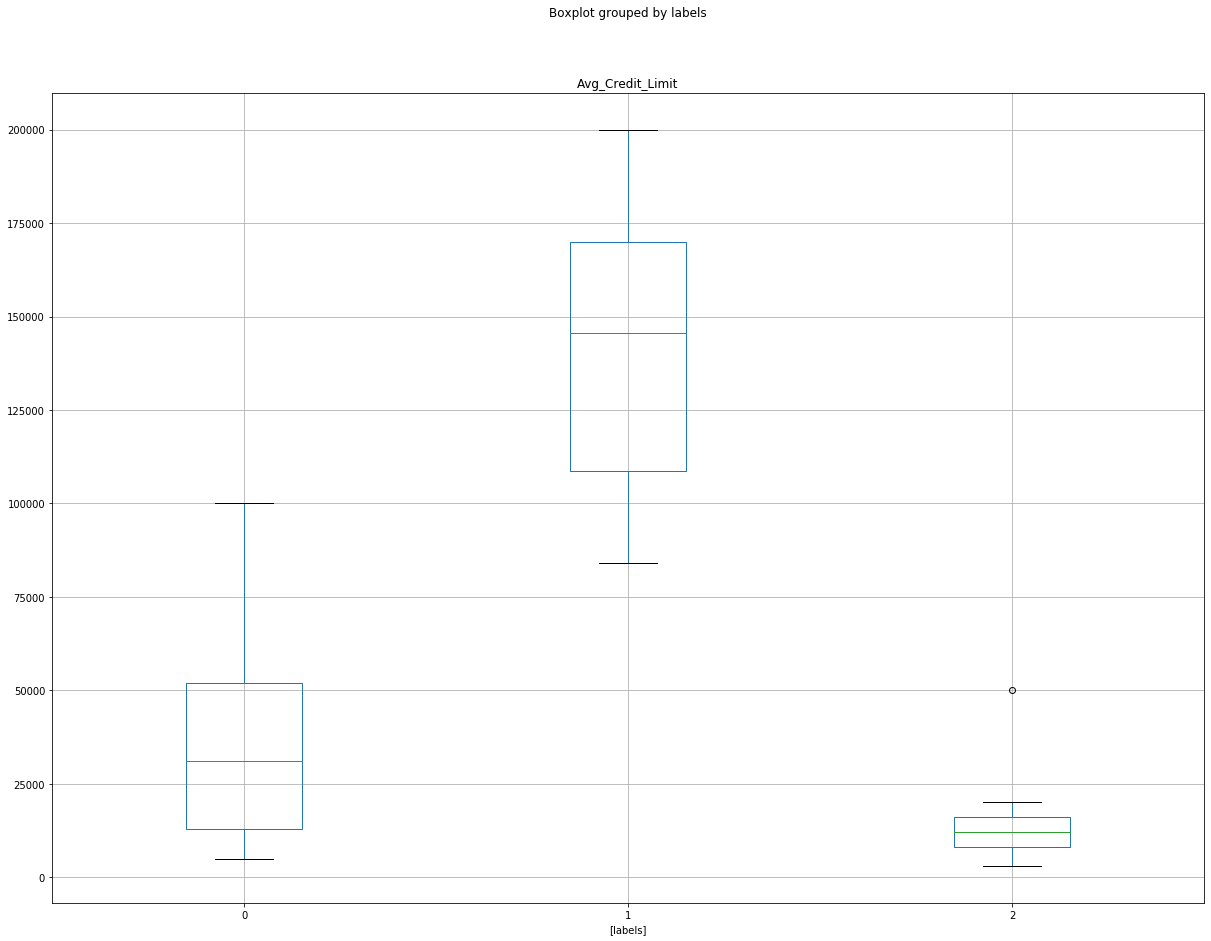

In [89]:
df_labeled[['Avg_Credit_Limit','labels']].boxplot(by = 'labels',figsize=(20, 15))

In [90]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, '3D plot of KMeans Clustering')

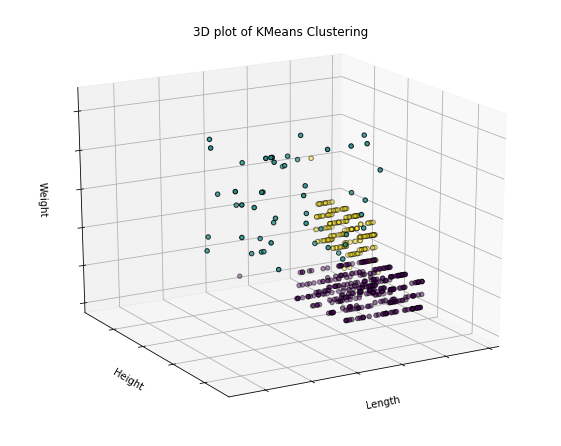

In [91]:
## 3D plots of clusters
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
kmeans.fit(df_z)
labels = kmeans.labels_
ax.scatter(df_z.iloc[:, 0], df_z.iloc[:, 1], df_z.iloc[:, 3],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')

## Conclusion

In [92]:
# looking at box plots and 3D graphs i can seggrigate customer data in below 3 clusters

# Cluster 1 - high profile customer
# High Credit Limit Customers. these customers has
# high credit limit, from 80000 to 200000
# very less no of bank visits
# making less calls
# doing most of things online
# has average 9 credit cards
# these segment customer doing things by themselfs

# Cluster 2 - routine average customers
# Medium Credit Limit Customers. these customers has
# medium credit limit from 5000 to 100000
# mostly prefer to use online system
# sometimes visits to bank and sometime calling as well
# has average 6 credit cards


# Cluster 3 - telecaller customers, needs more attention
# Low Credit Limit Customers. these customers has
# Low credit limit from 2000 to 20000
# less no of bank visits
# but making more calls
# doing most of things online
# has average 2 credit cards


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Assignment Completed

Project work is checked in to github on below path:

https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-deepkanpur